In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('C:/Users/Randy/Downloads/archive1/tested.csv')
data.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [114]:
print("---Column names---")
print("")
print(data.columns)
print("")
print("---Info---")
print("")
print(data.info())
print("")
print("---Data Shape---")
print("")
print(data.shape)

---Column names---

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

---Info---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

---Data Shape---

(418, 12)


In [115]:
list(set(data.dtypes))

[dtype('int64'), dtype('float64'), dtype('O')]

In [116]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [117]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Survived']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [118]:
strat_train_set['Survived'].value_counts()

0    213
1    121
Name: Survived, dtype: int64

In [119]:
strat_test_set['Survived'].value_counts()

0    53
1    31
Name: Survived, dtype: int64

In [120]:
strat_train_features = strat_train_set.drop(columns=['Survived']).copy()
strat_train_label = strat_train_set['Survived']

In [121]:
strat_train_features.head()

PassengerId  Pclass                           Name     Sex   Age  SibSp  \
163         1055       3             Pearce, Mr. Ernest    male   NaN      0   
223         1115       3  Karlsson, Mr. Einar Gervasius    male  21.0      0   
183         1075       3              Lane, Mr. Patrick    male   NaN      0   
21           913       3      Olsen, Master. Artur Karl    male   9.0      0   
111         1003       3     Shine, Miss. Ellen Natalia  female   NaN      0   

     Parch   Ticket    Fare Cabin Embarked  
163      0   343271  7.0000   NaN        S  
223      0   350053  7.7958   NaN        S  
183      0     7935  7.7500   NaN        Q  
21       1  C 17368  3.1708   NaN        S  
111      0   330968  7.7792   NaN        Q

In [122]:
strat_train_features = strat_train_features.set_index('PassengerId')

In [123]:
strat_train_features.describe()

Pclass         Age       SibSp       Parch        Fare
count  334.000000  265.000000  334.000000  334.000000  333.000000
mean     2.272455   30.473585    0.440120    0.380240   36.488014
std      0.852846   14.346239    0.917469    0.924653   57.950135
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000   21.000000    0.000000    0.000000    7.879200
50%      3.000000   27.000000    0.000000    0.000000   13.775000
75%      3.000000   39.000000    1.000000    0.000000   31.387500
max      3.000000   76.000000    8.000000    9.000000  512.329200

In [124]:
Null_Values = strat_train_features.isnull().sum().sort_values(ascending=False) 
Null_Values_Percent = (strat_train_features.isnull().sum()/strat_train_features.isnull().count()).sort_values(ascending=False) 
Null_Values_data =pd.concat([Null_Values,Null_Values_Percent],axis=1,keys=['Null Values','Null Values %']) 
Null_Values_data

Null Values  Null Values %
Cabin             257       0.769461
Age                69       0.206587
Fare                1       0.002994
Pclass              0       0.000000
Name                0       0.000000
Sex                 0       0.000000
SibSp               0       0.000000
Parch               0       0.000000
Ticket              0       0.000000
Embarked            0       0.000000

In [135]:
strat_train_features['Pclass'] = strat_train_features['Pclass'].astype('O')
strat_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 1055 to 1120
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    334 non-null    object 
 1   Name      334 non-null    object 
 2   Sex       334 non-null    object 
 3   Age       265 non-null    float64
 4   SibSp     334 non-null    int64  
 5   Parch     334 non-null    int64  
 6   Ticket    334 non-null    object 
 7   Fare      333 non-null    float64
 8   Cabin     77 non-null     object 
 9   Embarked  334 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 28.7+ KB


In [173]:
strat_train_label.info()

<class 'pandas.core.series.Series'>
Int64Index: 334 entries, 163 to 228
Series name: Survived
Non-Null Count  Dtype
--------------  -----
334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [221]:
list_cat = ['Pclass', 'Sex', 'Embarked']

for n in list_cat:
    attributes = strat_train_features[n].value_counts()
    print("----" , n, "----")
    print()
    print(attributes)
    print()

---- Pclass ----

3    179
1     88
2     67
Name: Pclass, dtype: int64

---- Sex ----

male      213
female    121
Name: Sex, dtype: int64

---- Embarked ----

S    223
C     77
Q     34
Name: Embarked, dtype: int64



In [137]:
print(f"Num Features: {list(strat_train_features.select_dtypes(include=['int64', 'float64']))}")
print(f"Cat Features: {list(strat_train_features.select_dtypes(include=['O']))}")

Num Features: ['Age', 'SibSp', 'Parch', 'Fare']
Cat Features: ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


<AxesSubplot:>

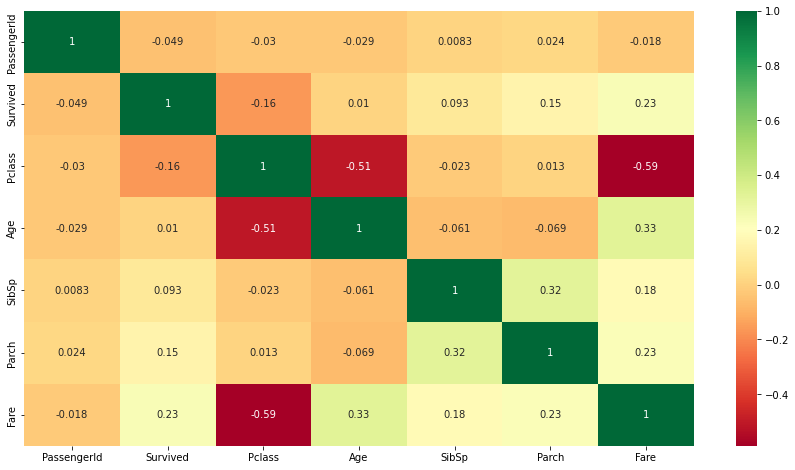

In [136]:
plt.figure(figsize=(15,8))
sns.heatmap(strat_train_set.corr(),annot=True,cmap="RdYlGn")

# Pipeline

In [208]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                          ('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                        ('cat_encoder', OneHotEncoder(sparse=False))])
num_attribs = ['Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Pclass', 'Sex' ,'Embarked']

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs)
    ])

Final_train_prepared = full_pipeline.fit_transform(strat_train_features)
Final_train_prepared.shape

(334, 12)

# RandomForest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest_clf = RandomForestClassifier(random_state=45)
forest_clf_predict_proba = cross_val_predict(forest_clf, Final_train_prepared, strat_train_label, cv=3,
 method="predict_proba")
forest_clf_predict_proba[:5]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ]])

In [184]:
forest_clf.fit(Final_train_prepared, strat_train_label)
y_forest_predictions = cross_val_predict(forest_clf, Final_train_prepared, strat_train_label, cv=3)
y_forest_predictions[:5]

array([0, 0, 0, 0, 1], dtype=int64)

# Cross Validation Score

In [185]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, Final_train_prepared, strat_train_label, cv=5, scoring="accuracy")

array([1., 1., 1., 1., 1.])

# F1 Score

In [186]:
from sklearn.metrics import f1_score
print(f"F1 Score: {f1_score(strat_train_label, y_forest_predictions)}")

F1 Score: 1.0


# Precision/Recall

In [187]:
from sklearn.metrics import precision_score, recall_score
print(f"Precision score: {precision_score(strat_train_label, y_forest_predictions)}")
print(f"Recall score: {recall_score(strat_train_label, y_forest_predictions)}")

Precision score: 1.0
Recall score: 1.0


# ROC AUC

In [188]:
from sklearn.metrics import roc_auc_score
y_scores_forest = forest_clf_predict_proba[:, 1]
print(f"ROC AUC Score: {roc_auc_score(strat_train_label, y_scores_forest)}")

ROC AUC Score: 1.0


# Confusion Matrix

In [210]:
from sklearn.metrics import confusion_matrix
confusion_matrix(strat_train_label, y_forest_predictions)

array([[213,   0],
       [  0, 121]], dtype=int64)

# Cross Validation on test set

In [189]:
strat_test_features = strat_test_set.drop(columns=['Survived']).copy()
strat_test_label = strat_test_set['Survived']

In [170]:
strat_test_features = strat_test_features.set_index('PassengerId')
strat_test_features.head()

Pclass                                          Name     Sex  \
PassengerId                                                                
1302             3                        Naughton, Miss. Hannah  female   
1256             1  Harder, Mrs. George Achilles (Dorothy Annan)  female   
1226             3                                 Cor, Mr. Ivan    male   
1068             2                          Sincock, Miss. Maude  female   
986              1                           Birnbaum, Mr. Jakob    male   

              Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
PassengerId                                                          
1302          NaN      0      0      365237   7.7500   NaN        Q  
1256         25.0      1      0       11765  55.4417   E50        C  
1226         27.0      0      0      349229   7.8958   NaN        S  
1068         20.0      0      0  C.A. 33112  36.7500   NaN        S  
986          25.0      0      0       13905  26.0000   NaN        C

In [171]:
strat_test_label.head()

410    1
364    1
334    0
176    1
94     0
Name: Survived, dtype: int64

In [167]:
strat_test_features['Pclass'] = strat_test_features['Pclass'].astype('O')
strat_test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1302 to 1010
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    84 non-null     object 
 1   Name      84 non-null     object 
 2   Sex       84 non-null     object 
 3   Age       67 non-null     float64
 4   SibSp     84 non-null     int64  
 5   Parch     84 non-null     int64  
 6   Ticket    84 non-null     object 
 7   Fare      84 non-null     float64
 8   Cabin     14 non-null     object 
 9   Embarked  84 non-null     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 7.2+ KB


In [174]:
print(f"Num Features: {list(strat_test_features.select_dtypes(include=['int64', 'float64']))}")
print(f"Cat Features: {list(strat_test_features.select_dtypes(include=['O']))}")

Num Features: ['Age', 'SibSp', 'Parch', 'Fare']
Cat Features: ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [190]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                          ('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                        ('cat_encoder', OneHotEncoder(sparse=False))])
num_attribs = ['Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Pclass', 'Sex' ,'Embarked']

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs)
    ])

Final_test_prepared = full_pipeline.fit_transform(strat_test_features)
Final_test_prepared.shape

(84, 12)

In [191]:
Final_test_prepared[:5]

array([[-0.09776344, -0.58874481, -0.37369925, -0.52255011,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [-0.34661583,  0.64761929, -0.37369925,  0.49611647,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [-0.18071423, -0.58874481, -0.37369925, -0.51943591,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ],
       [-0.76136981, -0.58874481, -0.37369925,  0.09687278,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [-0.34661583, -0.58874481, -0.37369925, -0.13274088,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ]])

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(n_estimators = 100, random_state=45)
y_forest_predictions_test = cross_val_predict(forest_clf, Final_test_prepared, strat_test_label, cv=3)
y_forest_predictions_test[:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [203]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 100, random_state=45)
forest_clf.fit(Final_train_prepared, strat_train_label)
forest_clf.predict(Final_test_prepared)

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

# Cross Validation Score

In [204]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, Final_test_prepared, strat_test_label, cv=5, scoring="accuracy")

array([1., 1., 1., 1., 1.])

# F1 Score

In [205]:
from sklearn.metrics import f1_score
print(f"F1 Score: {f1_score(strat_test_label, y_forest_predictions_test)}")

F1 Score: 1.0


# Confusion Matrix

In [209]:
from sklearn.metrics import confusion_matrix
confusion_matrix(strat_test_label, y_forest_predictions_test)

array([[53,  0],
       [ 0, 31]], dtype=int64)

In [231]:
data['Age_group'] = pd.cut(data['Age'], bins=[0., 15., 30., 45., 60., 75., np.inf], labels=[0, 15, 30, 45, 60, 75])
data.groupby(['Age_group']).mean()['Survived']

Age_group
0     0.406250
15    0.380952
30    0.350000
45    0.439024
60    0.300000
75    1.000000
Name: Survived, dtype: float64

# Feature Engineering

In [237]:
data[data['Survived'] == 1].groupby(['Age_group']).count()['Survived']

Age_group
0     13
15    64
30    28
45    18
60     3
75     1
Name: Survived, dtype: int64